In [ ]:
%pip install seaborn
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt  # Add this line
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import boto3




In [ ]:
# Python version
print(sys.version)

In [ ]:
# current path
print(sys.executable)

In [4]:
s3_bucket = "busonbucket"
def upload_to_s3 (localpath, remotepath):
    boto3.client("s3").upload_file(Filename=localpath, Bucket=s3_bucket, Key=remotepath)

def download_from_s3(localpath, remotepath):
    boto3.client("s3").download_file(s3_bucket, remotepath, localpath)    

In [5]:
# download_from_s3("train.csv","train.csv")

In [6]:
# download_from_s3("test.csv","test.csv")

In [7]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')  #To be used at the end of the project

In [ ]:
data

In [ ]:
data_test

In [ ]:
print("Number of empty data in the Train data set")
print(data.isna().sum())
print("-------------------------------------------")
print("Number of empty data in the Test data set")
print(data_test.isna().sum())

In [11]:
data["Fiyat"] = data["Fiyat"].str.replace("TL", "", regex=False).str.replace(".", "").str.replace(",", ".").astype(float)
data["Fiyat"] = data["Fiyat"].astype(float)

In [ ]:
data

In [13]:
# Encode the categorical variables
# Converting "Renk" column to numeric data
label_encoder = LabelEncoder()
data["Renk"] = label_encoder.fit_transform(data["Renk"])

# Converting "Seri" column to numeric data
label_encoder = LabelEncoder()
data["Seri"] = label_encoder.fit_transform(data["Seri"])

# Converting "Model" column to numeric data
label_encoder = LabelEncoder()
data["Model"] = label_encoder.fit_transform(data["Model"])

# Converting "Ilan Basligi" column to numeric data
label_encoder = LabelEncoder()
data["Ilan Basligi"] = label_encoder.fit_transform(data["Ilan Basligi"])

# Converting "Ilan Tarihi" column to numeric data
label_encoder = LabelEncoder()
data["Ilan Tarihi"] = label_encoder.fit_transform(data["Ilan Tarihi"])

# Converting "Il / Ilce" column to numeric data
label_encoder = LabelEncoder()
data["Il / Ilce"] = label_encoder.fit_transform(data["Il / Ilce"])

In [ ]:
data

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

In [ ]:
print(correlation_matrix['Fiyat'].sort_values(ascending=False))

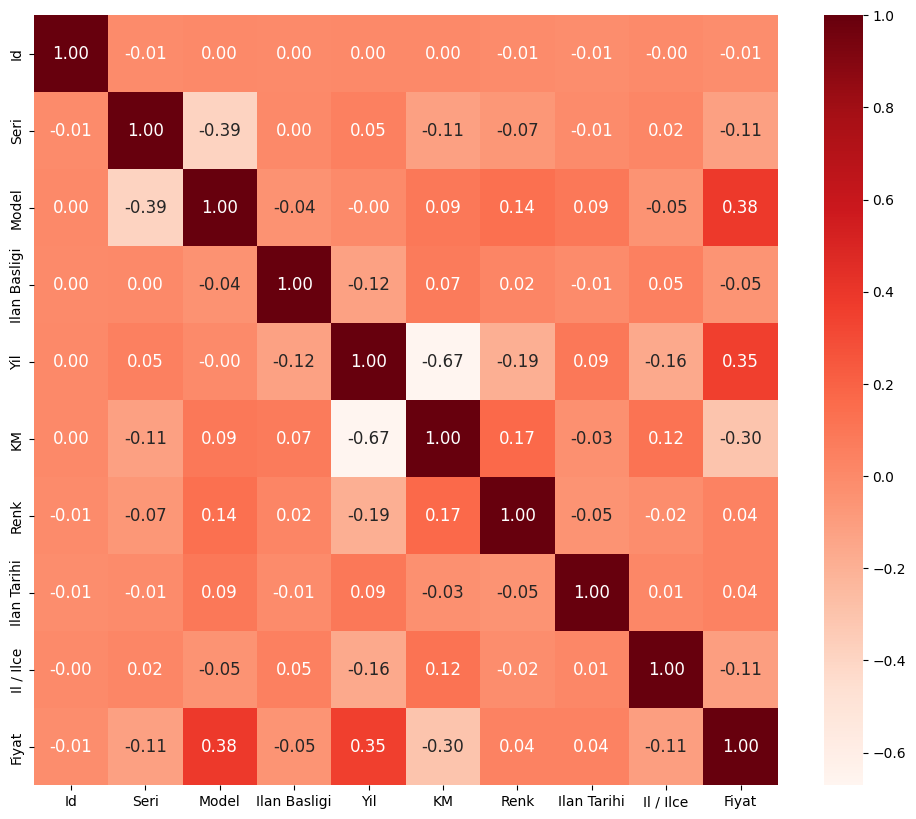

In [17]:
plt.figure(figsize=(12, 10))

# Draw the heatmap with larger annotation font size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap=plt.cm.Reds)

# Show the plot
plt.show()

In [18]:
# Drop the columns that we won't use
data.drop(["Id", "Ilan Basligi", "Ilan Tarihi", "Il / Ilce" , "Seri"], axis=1, inplace=True)

In [19]:
data

,Model,Yil,KM,Renk,Fiyat
0,72,2017,59.0,14,85000.0
1,504,1992,290.0,17,15900.0
2,540,2004,260.0,4,21500.0
3,1010,2014,139.0,2,146500.0
4,1014,2010,173.0,2,86500.0
...,...,...,...,...,...
9569,360,2016,92.0,14,116800.0
9570,1069,2012,145.0,2,220000.0
9571,701,2013,160.0,14,80000.0
9572,645,1997,225.0,0,27500.0


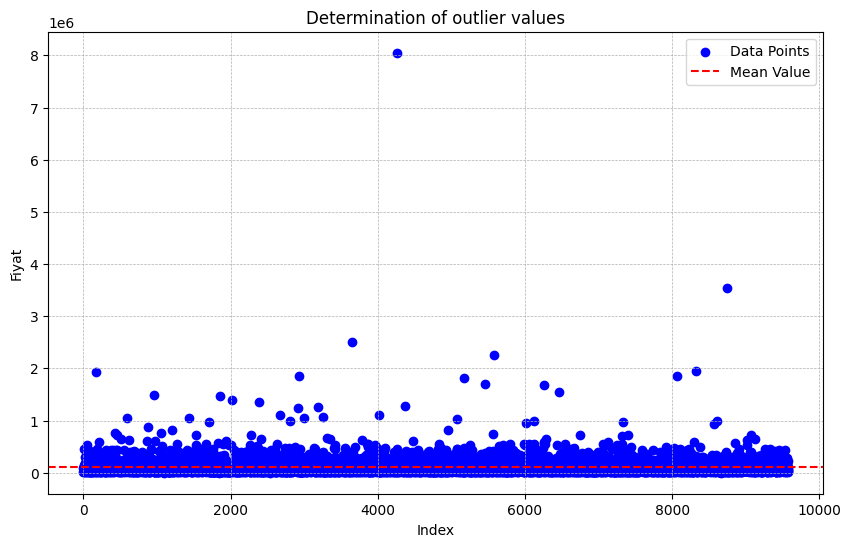

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data["Fiyat"], color='blue', label='Data Points')

# Mean line
plt.axhline(y=data["Fiyat"].mean(), color='red', linestyle='--', label='Mean Value')

# Titles and labels
plt.title("Determination of outlier values")
plt.xlabel("Index")
plt.ylabel("Fiyat")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Show the plot
plt.show()

In [21]:
# Calculate the Interquartile Range (IQR):
x = int((data['Fiyat'].quantile(0.75)-data['Fiyat'].quantile(0.25))*1.5)

alt =data['Fiyat'].quantile(0.25)-x
ust =data['Fiyat'].quantile(0.75)+x

print("Values less than", alt , "will be considered Outlier")
print("Values more than", ust , "will be considered Outlier")

mean = int(data.query(f'Fiyat >{alt} & Fiyat < {ust}')['Fiyat'].mean())
data.loc[data["Fiyat"]<alt,"Fiyat"] = mean
data.loc[data["Fiyat"]>ust,"Fiyat"] = mean

Values less than -74250.0 will be considered Outlier
Values more than 235750.0 will be considered Outlier


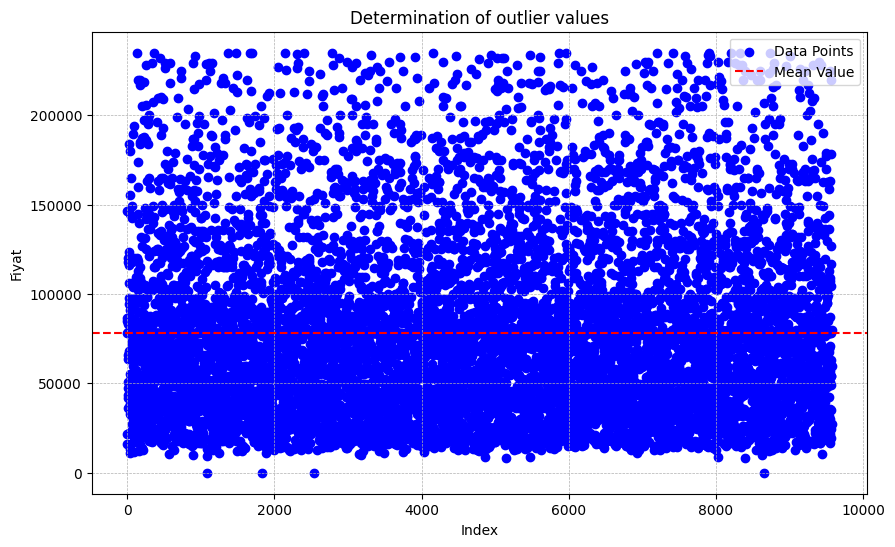

In [22]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(data.index, data["Fiyat"], color='blue', label='Data Points')

# Mean line
plt.axhline(y=data["Fiyat"].mean(), color='red', linestyle='--', label='Mean Value')

# Titles and labels
plt.title("Determination of outlier values")
plt.xlabel("Index")
plt.ylabel("Fiyat")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Show the plot
plt.show()

In [23]:
data

,Model,Yil,KM,Renk,Fiyat
0,72,2017,59.0,14,85000.0
1,504,1992,290.0,17,15900.0
2,540,2004,260.0,4,21500.0
3,1010,2014,139.0,2,146500.0
4,1014,2010,173.0,2,86500.0
...,...,...,...,...,...
9569,360,2016,92.0,14,116800.0
9570,1069,2012,145.0,2,220000.0
9571,701,2013,160.0,14,80000.0
9572,645,1997,225.0,0,27500.0


In [24]:
data['Fiyat']

0        85000.0
1        15900.0
2        21500.0
3       146500.0
4        86500.0
          ...   
9569    116800.0
9570    220000.0
9571     80000.0
9572     27500.0
9573     60000.0
Name: Fiyat, Length: 9574, dtype: float64

In [25]:
#80 % train-test split
split = int(0.8*data.shape[0])  #row,colon
train_data = data[:split]
test_data = data[split:]
test_data = test_data.reset_index(drop=True)

In [26]:
train_data.shape, test_data.shape

((7659, 5), (1915, 5))

In [27]:
data.columns

Index(['Model', 'Yil', 'KM', 'Renk', 'Fiyat'], dtype='object')

In [28]:
input_cols = ['Model', 'Yil', 'KM' ,'Renk',]

In [29]:
output_cols = ['Fiyat']

In [30]:
X_train = np.asarray(train_data[input_cols])
y_train = np.asarray(train_data[output_cols])
y_train=y_train.astype('int')

X_test = np.asarray(test_data[input_cols])
y_test = np.asarray(test_data[output_cols])
y_test=y_test.astype('int')

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
y_pred

array([[70587.87383713],
       [70376.74847453],
       [35233.26333623],
       ...,
       [98941.65714133],
       [34526.69397901],
       [96806.55135621]])

In [34]:
#Required codes to convert "y_pred" values to "Fiyat" format
y_pred = np.round(y_pred/50) * 50
y_pred = y_pred.astype(int)

print(y_pred)

[[70600]
 [70400]
 [35250]
 ...
 [98950]
 [34550]
 [96800]]


In [35]:
count = 0
for i in y_pred:
    if i in y_test: 
        count += 1

print("Total:", count)

Total: 370


In [36]:
#Calculate R2 Score

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

R2 score:  0.546009882772352


In [37]:
%pip install joblib
import joblib

Note: you may need to restart the kernel to use updated packages.


In [40]:
joblib.dump(model,'./model.pkl')

['./model.pkl']

In [39]:
upload_to_s3('model.pkl','model_car.pkl')